PART 1: STROKE PREDICTION MODEL WITH DECISON TREES ALGORITHM USING SICKIT LEARN

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

RANDOM_STATE = 55 ## We will pass it to every sklearn call so we ensure reproducibility

In [2]:
# Load the dataset using pandas
df = pd.read_csv("stroke.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df = df.drop(columns=['id'])

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Performing one-hot encoding on the categorical variables
cat_variables = ['gender',
'ever_married',
'work_type',
'Residence_type',
'smoking_status']


In [7]:
# This will replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is.
df = pd.get_dummies(data = df, prefix = cat_variables, columns = cat_variables)

In [8]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,202.21,NaN,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.0,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False


In [9]:
#Choosing the target variable and the features
features = [x for x in df.columns if x not in 'stroke'] ## Removing our target variable

In [10]:
print(len(features))


21


In [11]:
#Splitting the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(df[features], df['stroke'], train_size=0.8, random_state=RANDOM_STATE)

In [12]:
print(f'train samples: {len(X_train)} validation samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 4088 validation samples: 1022
target proportion: 0.0492


In [13]:
#Define the Hyperparameters for the Decision Tree model
min_samples_split_list = [2, 5, 10, 80, 250, 800]
max_depth_list = [2, 5, 10, 20, 50, 100, None]

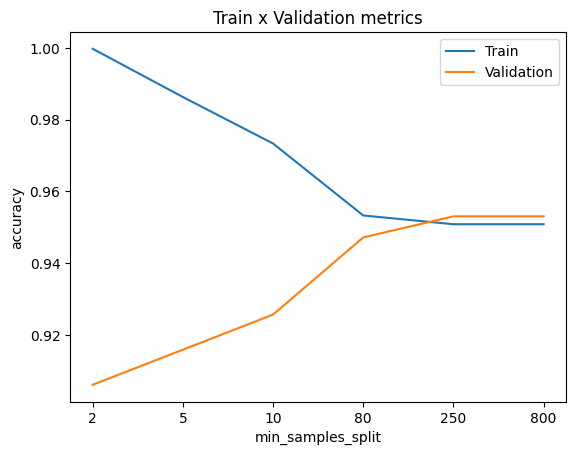

In [14]:
#Testing out the Decision Tree model using different values in the sample minimum split list hyperparameters

accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

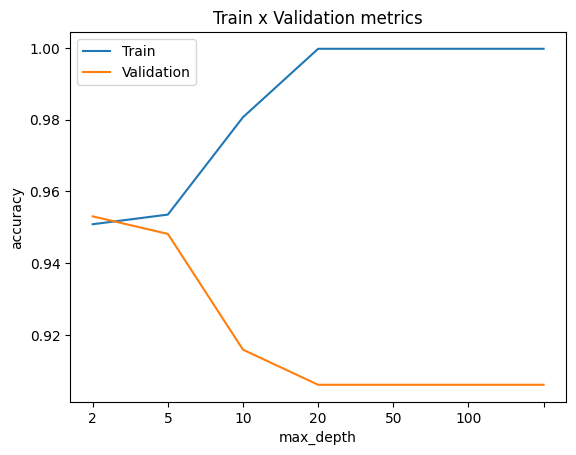

In [15]:
#Testing out the Decision Tree model using different values in the max depth list hyperparameters

accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [16]:
#Using the best hyperparameters define the model

decision_tree_model = DecisionTreeClassifier(min_samples_split = 150,
                                             max_depth = 2,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [17]:
#Compute Accuracy Scores
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9508
Metrics validation:
	Accuracy score: 0.9530


In [43]:
#Use the model to predict the probability of stroke
df['stroke_probability'] = decision_tree_model.predict_proba(df[features])[:,1]
print(df[['stroke','stroke_probability']].head())

   stroke  stroke_probability
0       1            0.079417
1       1            0.079417
2       1            0.157729
3       1            0.010076
4       1            0.157729


PART 2: STROKE PREDICTION MODEL WITH DECISON TREES BUT USING RANDOM FOREST ALGORITHM FROM SICKIT LEARN


In [22]:
#Define the Hyperparameters for the Decision Tree model
min_samples_split_list = [2, 5, 10, 80, 250, 800]
max_depth_list = [2, 5, 10, 20, 50, 100, None]
n_estimators_list = [10,50,100,500]

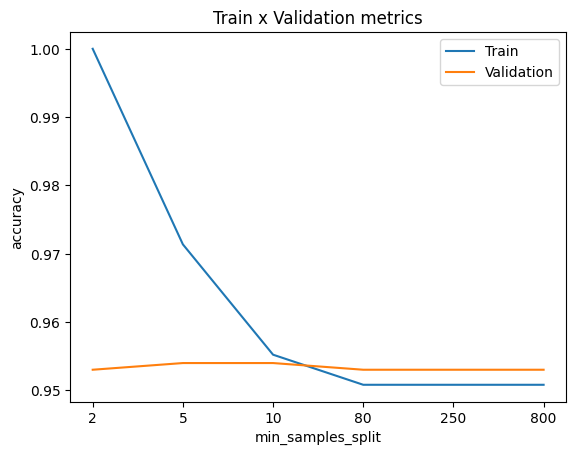

In [23]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

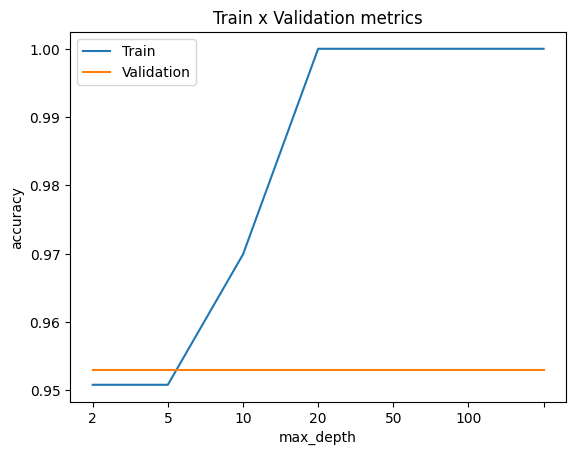

In [24]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

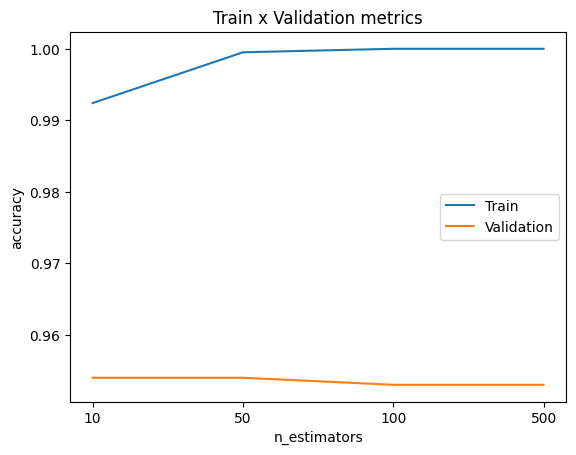

In [25]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [26]:
#Using the best hyperparameters define the model using Random Forest
random_forest_model = RandomForestClassifier(n_estimators = 50,
                                             max_depth = 15,min_samples_split=10,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [27]:
#Compute Accuracy Scores
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9540
Metrics test:
	Accuracy score: 0.9540


In [42]:
#Use the model to predict the probability of stroke
df['stroke_probability'] = random_forest_model.predict_proba(df[features])[:,1]
print(df[['stroke','stroke_probability']].head())

   stroke  stroke_probability
0       1            0.460374
1       1            0.280161
2       1            0.346945
3       1            0.260232
4       1            0.306028


PART 2: STROKE PREDICTION MODEL WITH DECISON TREES BUT USING XGBOOST.

In [28]:
#Define subset of training set to train the model
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval

In [29]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [30]:
#Define and Fit the model
xgb_model = XGBClassifier(n_estimators = 50, learning_rate = 0.1, early_stopping_rounds=15, verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train_fit, y_train_fit, eval_set=[(X_train_eval, y_train_eval)])

[0]	validation_0-logloss:0.23073
[1]	validation_0-logloss:0.22161
[2]	validation_0-logloss:0.21294
[3]	validation_0-logloss:0.20620
[4]	validation_0-logloss:0.20007
[5]	validation_0-logloss:0.19512
[6]	validation_0-logloss:0.19062
[7]	validation_0-logloss:0.18738
[8]	validation_0-logloss:0.18459
[9]	validation_0-logloss:0.18182
[10]	validation_0-logloss:0.17872
[11]	validation_0-logloss:0.17624
[12]	validation_0-logloss:0.17384
[13]	validation_0-logloss:0.17178
[14]	validation_0-logloss:0.16966
[15]	validation_0-logloss:0.16871
[16]	validation_0-logloss:0.16801
[17]	validation_0-logloss:0.16684
[18]	validation_0-logloss:0.16574
[19]	validation_0-logloss:0.16465
[20]	validation_0-logloss:0.16400
[21]	validation_0-logloss:0.16361
[22]	validation_0-logloss:0.16324
[23]	validation_0-logloss:0.16288
[24]	validation_0-logloss:0.16251
[25]	validation_0-logloss:0.16225
[26]	validation_0-logloss:0.16217
[27]	validation_0-logloss:0.16199
[28]	validation_0-logloss:0.16179
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=15,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

In [31]:
#Check Best Iteration
print(f"Best iteration: {xgb_model.best_iteration}")

Best iteration: 35


In [32]:
#Compute Accuracy Scores
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9555
Metrics test:
	Accuracy score: 0.9521


In [40]:
#Use the model to predict the probability of stroke
df['stroke_probability'] = xgb_model.predict_proba(df[features])[:,1]
print(df[['stroke','stroke_probability']].tail())

      stroke  stroke_probability
5105       0            0.301030
5106       0            0.096702
5107       0            0.011853
5108       0            0.033187
5109       0            0.010012


FROM  THIS WE CAN CONCLUDE IN TERMS OF ACCURACY THE BEST ALGORITHMS FOR A DECISON TREE:

1. XG BOOST
2. RANDOM FOREST
3. NORMAL DECISION TREE
